In [9]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [10]:
# Generate a synthetic dataset with non-linear separation
X, y = make_circles(n_samples=250, noise=0.1, factor=0.2, random_state=42)

In [11]:
# Define the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=1, C=10)

In [12]:
# Fit the SVM model to the data
svm_model.fit(X, y)

SVC(C=10, gamma=1)

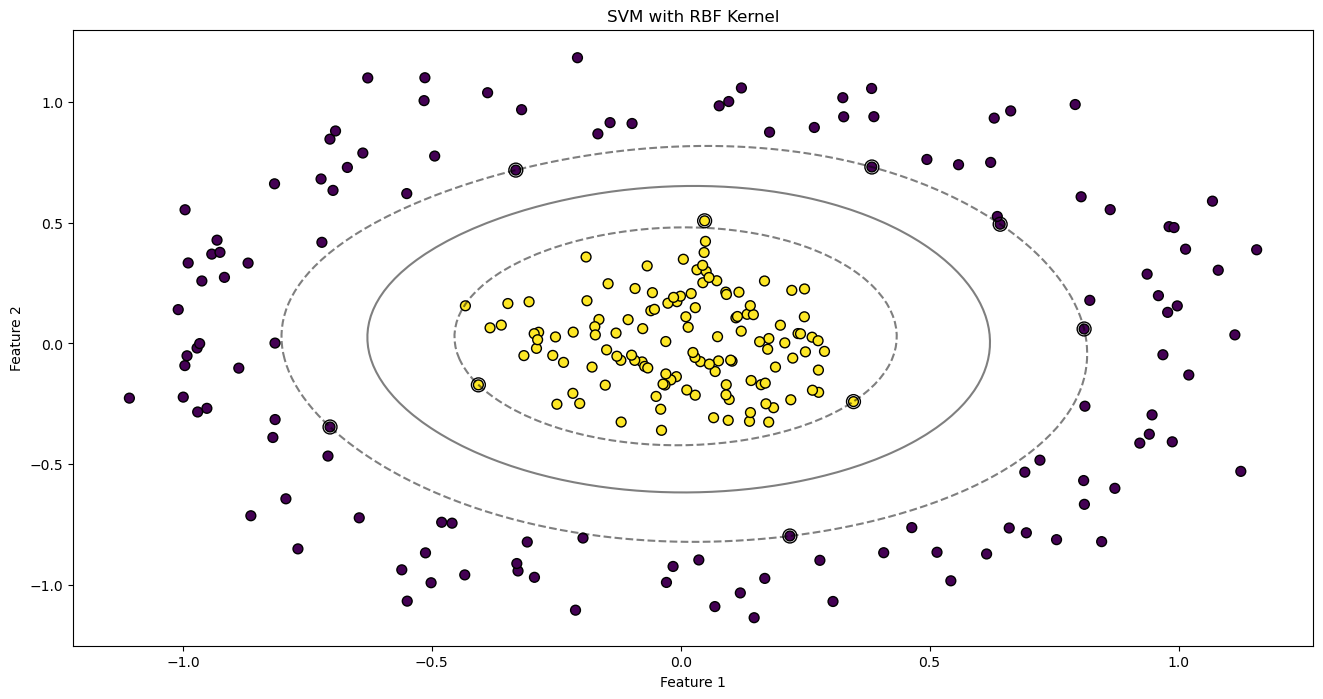

In [13]:
# Plot the decision boundary
plt.figure(figsize=(16, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel')
plt.show()
